In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1234)  # reproducible numbers!
N_POINTS = 32
x1_ab = (-0.2, 0.6)
x2_ab = (0.0, 0.8)

In [3]:
dataset = np.zeros((3, N_POINTS))
dataset[0, :] = np.round(np.random.uniform(low=x1_ab[0], high=x1_ab[1], size=N_POINTS), 2)
dataset[1, :] = np.round(np.random.uniform(low=x2_ab[0], high=x2_ab[1], size=N_POINTS), 2)

dataset[2, :] = np.array((0.75 * dataset[0, :] + 0.3 >= dataset[1, :]))
print(dataset[:, :9])

[[-0.05  0.3   0.15  0.43  0.42  0.02  0.02  0.44  0.57]
 [ 0.64  0.12  0.56  0.56  0.18  0.74  0.35  0.73  0.05]
 [ 0.    1.    0.    1.    1.    0.    0.    0.    1.  ]]


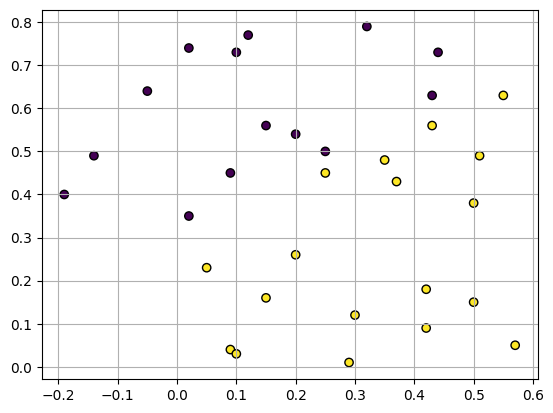

In [4]:
plt.scatter(dataset[0, :], dataset[1, :], c=dataset[2, :], edgecolor="black")
plt.grid()

In [5]:
from perceptron_sgd import Perceptron
P = Perceptron(np.transpose(dataset[:2, :]), dataset[2, :])

In [6]:
P.train()

In [7]:
from sklearn.inspection import DecisionBoundaryDisplay

In [8]:
x1, x2 = np.meshgrid(
    np.linspace(np.min(dataset[0, :]), np.max(dataset[0, :])),
    np.linspace(np.min(dataset[1, :]), np.max(dataset[1, :]))
)

In [9]:
prediction = np.zeros((50, 50))
for i in range(50):
    for j in range(50):
        features = np.array([[x1[i, j], x2[i, j]]])
        prediction[i, j] = P.predict(features)

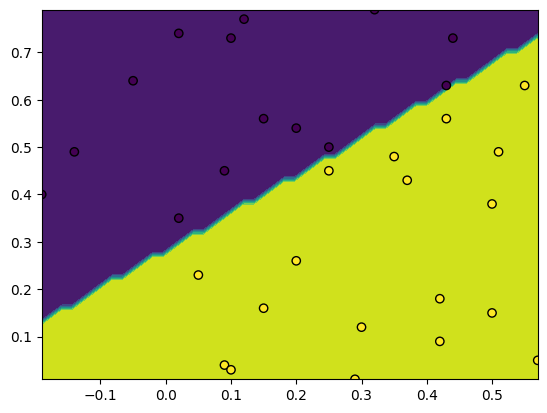

In [10]:
decision_boundary = DecisionBoundaryDisplay(xx0=x1, xx1=x2, response=prediction)
decision_boundary.plot()
plt.scatter(dataset[0, :], dataset[1, :], c=dataset[2, :], edgecolor="black")

In [11]:
P._epochs, P._weights

(30,
 array([[ 0.06088049],
        [-0.07717967]]))

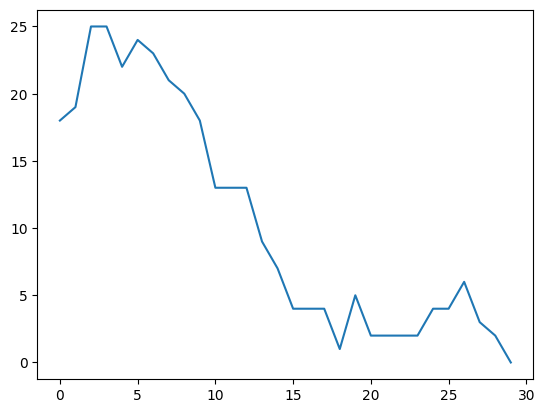

In [12]:
plt.plot([x for x in range(len(P._errors))], P._errors)

In [13]:
from sklearn.linear_model import Perceptron
P = Perceptron()

In [14]:
P.fit(np.transpose(dataset[:2, :]), dataset[2, :])

Perceptron()

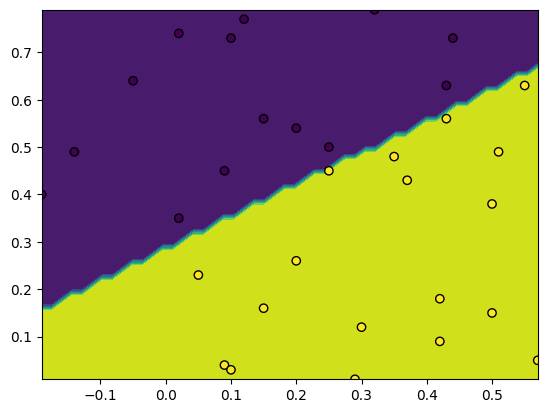

In [15]:
prediction = np.zeros((50, 50))
for i in range(50):
    for j in range(50):
        features = np.array([[x1[i, j], x2[i, j]]])
        prediction[i, j] = P.predict(features)[0]
decision_boundary = DecisionBoundaryDisplay(xx0=x1, xx1=x2, response=prediction)
decision_boundary.plot()
plt.scatter(dataset[0, :], dataset[1, :], c=dataset[2, :], edgecolor="black")